In [1]:
# adjsut the basic logging lovel of notebook
import logging
logging.basicConfig(level=logging.WARNING)

import os
import yaml
import numpy as np
import pandas as pd
import scipy as scp
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn as sns
from matplotlib.lines import Line2D
from palettable.colorbrewer import qualitative

import auditory_cortex.analysis as analysis
from auditory_cortex import results_dir, aux_dir, saved_corr_dir
from auditory_cortex.utils import CorrelationUtils

from pycolormap_2d import ColorMap2DBremm, ColorMap2DZiegler
%matplotlib inline



In [3]:
res = 'wave2vec_opt_neural_delay'
corr_obj = analysis.Correlations(res)
corr_obj.data['layer'].unique()
corr_obj.get_selected_data(bin_width=20, delay=0, N_sents=499,
                           threshold=0.08)

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays,normalized_test_cc,layer_type
1786,180731.0,0.0,0.0,20.0,0.0,0.0,0.011686,0.086194,500.0,100.0,0.039805,conv
1787,180731.0,0.0,1.0,20.0,0.0,0.0,0.031729,0.318689,500.0,55.0,0.056204,conv
1788,180731.0,0.0,2.0,20.0,0.0,0.0,0.004858,0.231168,500.0,95.0,0.010103,conv
1789,180731.0,0.0,3.0,20.0,0.0,0.0,0.042761,0.148637,500.0,80.0,0.110913,conv
1790,180731.0,0.0,4.0,20.0,0.0,0.0,0.030506,0.182791,500.0,85.0,0.071353,conv
...,...,...,...,...,...,...,...,...,...,...,...,...
36456,200206.0,18.0,59.0,20.0,0.0,0.0,0.380833,0.506141,500.0,5.0,0.535303,conv
36457,200206.0,18.0,60.0,20.0,0.0,0.0,0.541352,0.579529,500.0,10.0,0.711119,conv
36458,200206.0,18.0,61.0,20.0,0.0,0.0,0.381674,0.445747,500.0,80.0,0.571674,conv
36459,200206.0,18.0,62.0,20.0,0.0,0.0,0.588501,0.550849,500.0,20.0,0.792923,conv


### merge corr results...

In [38]:
model_name = 'wave2vec2'
output_id = 1

ids = [
        'all_opt_delays_feature_extractor',
        'all_opt_delays',
    ]
# ids = [
#         'opt_neural_delay_1_third_feature_extractor',
#         'opt_neural_delay_1_third',

#     ]
CorrelationUtils.merge_correlation_results(
        model_name=model_name,
        file_identifiers=ids,
        idx=output_id
    )

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2vec2_all_opt_delays_corr_results.csv


### add layer types and copy normalizer..

In [48]:
model_name = 'deepspeech2'
# model_name = 'wave2letter_modified'
# model_name = 'speech2text'
# model_name = 'wave2vec2'
# model_name = 'wave2vec'


ids = [
    'opt_neural_delay'
    # 'opt_neural_delay_1_third',
    # 'opt_neural_delay_2_third',
    # 'opt_neural_delay_3_third'
]

# id = 'opt_neural_delay_2_third'

for id in ids:
    filler = ''
    if id != '':
        filler = '_'
    model_identifier = model_name + filler + id

    # add layer types...
    print("adding layer types...")
    CorrelationUtils.add_layer_types(model_name, id)

    print("Copying normalizer...")
    CorrelationUtils.copy_normalizer(model_identifier)



adding layer types...
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_opt_neural_delay_corr_results.csv
Writing back...!
Copying normalizer...
Reading file from: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_opt_neural_delay_corr_results.csv
Reading normalizers from: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_normalizer2_corr_results.csv
Normalizer updated and written back to file: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_opt_neural_delay_corr_results.csv


### analyzing...

Baseline median: 0.183


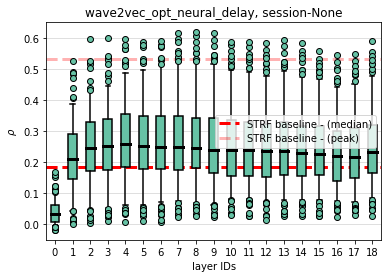

In [4]:
# model_name = 'wave2letter_modified'
# model_name = 'speech2text'
# model_name = 'wave2vec2'
model_name = 'wave2vec'
# id = 'opt_neural_delay_1_third'
id = 'opt_neural_delay'
filler = ''
if id != '':
    filler = '_'
model_identifier = model_name + filler + id
corr_obj = analysis.Correlations(model_identifier)
ax = corr_obj.box_plot_correlations(threshold=0.1)

In [5]:
CorrelationUtils.copy_normalizer(model_identifier)

Reading file from: /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_opt_neural_delay_3_third_corr_results.csv
Reading normalizers from: /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_normalizer2_corr_results.csv
Normalizer updated and written back to file: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_opt_neural_delay_3_third_corr_results.csv


Baseline median: 0.183


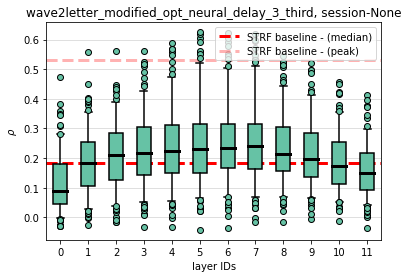

In [6]:
corr_obj = analysis.Correlations(model_identifier)

ax = corr_obj.box_plot_correlations(threshold=0.1)

In [ ]:
corr_obj.get_good_channels(session=180807 , threshold=0.1)

In [3]:
from auditory_cortex import analysis

model_name = 'wave2vec'
# id = 'opt_neural_delay_3_third'
id = 'opt_neural_delay_1_third'

filler = ''
if id != '':
    filler = '_'
model_identifier = model_name + filler + id
corr = analysis.Correlations(model_name=model_identifier)
corr.get_all_sessions().shape

(20,)

In [3]:
import os
import pandas as pd
from auditory_cortex import saved_corr_dir

strf_file = 'STRF_3_third_corr_results.csv'
file_path = os.path.join(saved_corr_dir, strf_file)
df = pd.read_csv(file_path)
len(df['session'].unique())

45

array([180413., 180420., 180501.])

In [3]:
from auditory_cortex import config
from auditory_cortex import monkey_to_session


normalizer_model = 'wave2letter_modified_normalizer2'

corr_obj = analysis.Correlations(normalizer_model)

data_dir = config['neural_data_dir']
bad_sessions = config['bad_sessions']

## read the sessions available in data_dir
sessions = np.array(os.listdir(data_dir))
sessions = np.delete(sessions, np.where(sessions == "out_sentence_details_timit_all_loudness.mat"))
for s in bad_sessions:
    sessions = np.delete(sessions, np.where(sessions == s))
sessions = np.sort(sessions)

In [18]:
corr_obj.get_selected_data(bin_width=20, delay=0, N_sents=499, threshold=0.082)['session'].unique().shape

(16,)

In [4]:
# session = sessions[0]
num_sig_sessions = 0
total_num_channels = 0
total_sig_channels = 0
for session in sessions:
    channels = os.listdir(os.path.join(data_dir,session))
    num_channels = len(channels)
    subject = channels[0][:1]
    corr_channels = corr_obj.get_all_channels(session)
    sig_channels = corr_obj.get_good_channels(session, threshold=0.08)

    total_num_channels += num_channels
    total_sig_channels += len(sig_channels)
    if len(sig_channels) > 0:
        num_sig_sessions += 1
    sub = [k for k,v in monkey_to_session.items() if int(session) in v][0]
    # print(session, end=', ')
    # print(num_channels, end=' - ')
    # print(len(corr_channels), end=', ')
    # print(subject, end='')
    # print(sub, end=', ')
    # print(len(sig_channels))

print(f"Total recording sessions: {len(sessions)}")
print(f"Number of sig sessions: {num_sig_sessions}")
print(f"Total recording channels: {total_num_channels}")
print(f"Number of sig channels: {total_sig_channels}")
    


Total recording sessions: 45
Number of sig sessions: 16
Total recording channels: 1920
Number of sig channels: 176


In [ ]:
session = session[0]


In [25]:


sess = sessions[0]

 

sub
# for k,v in monkey_to_session.items():
#     print(k, v)
#         # sub = k

'b'

In [4]:
thres = 0.25
data = corr.get_selected_data(bin_width=20, delay=0, N_sents=499, threshold=thres,
                       layer=0)

In [5]:
sessions = data['session'].unique()

In [6]:
sessions

array([180731., 200213.])

In [14]:
for session in sessions:
    num = data[data['session']==session].shape[0]
    print(session, num)

200206.0 43
180731.0 5
200213.0 1
191206.0 1
180720.0 1
200207.0 2
191113.0 5
180807.0 7
200313.0 2


### CorrelationUtils class

In [7]:
class CorrelationUtils:
    """Contains utility functions for correlations analysis related help.
    """

    @staticmethod
    def add_layer_types(model_name, results_identifer):

        # reading layer_types from aux config...
        layer_types = {}
        config_file = os.path.join(aux_dir, f"{model_name}_config.yml")
        with open(config_file, 'r') as f:
            config = yaml.load(f, yaml.FullLoader)

        # config['layers']
        for layer_config in config['layers']:
            layer_types[layer_config['layer_id']] = layer_config['layer_type']

        # reading results directory...
        if results_identifer != '':
            model = f'{model_name}_{results_identifer}'
        else:
            model = model_name 
        filename = f"{model}_corr_results.csv"
        file_path = os.path.join(saved_corr_dir, filename)
        data = pd.read_csv(file_path)
        print(f"reading from {file_path}")

        # remove 'Unnamed' columns
        data = data.loc[:, ~data.columns.str.contains('Unnamed')]

        # add 'layer_type' as a column
        for layer, type in layer_types.items():
            ids = data[data['layer']==layer].index
            data.loc[ids, 'layer_type'] = type

        data.to_csv(file_path, index=False)


### adding layer_types

In [10]:
# from auditory_cortex.utils import CorrelationUtils
# import torch

id = ''
# model_name = 'wave2vec'
# model_name = 'wave2letter_modified'
# model_name = 'speech2text'
# model_name = 'wave2vec2'
# model_name = 'deepspeech2'

# id = 'bi_lstm'
CorrelationUtils.add_layer_types(model_name, id)

reading from C:\Users\ahmedb\projects\auditory_cortex\results_dir\cross_validated_correlations\wave2letter_modified_corr_results.csv


### merge multiple files..

In [6]:

from auditory_cortex import saved_corr_dir
# def merge_correlation_results(model_name, file_identifiers, idx):
#     """
#     Args:

#         model_name: Name of the pre-trained network
#         file_identifiers: List of filename identifiers 
#         idx:    id of the file identifier to use for saving the merged results
#     """
#     # results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'

#     corr_dfs = []
#     for identifier in file_identifiers:
#         filename = f"{model_name}_{identifier}_corr_results.csv"
#         file_path = os.path.join(saved_corr_dir, filename)

#         corr_dfs.append(pd.read_csv(file_path))

#         # remove the file
#         os.remove(file_path)

#     # save the merged results at the very first filename...
#     output_identifer = file_identifiers[idx]    
#     filename = f"{model_name}_{output_identifer}_corr_results.csv"
#     file_path = os.path.join(saved_corr_dir, filename)

#     data = pd.concat(corr_dfs)
#     data.to_csv(file_path, index=False)
#     print(f"Output saved at: \n {file_path}")

In [7]:
# model_name = 'wave2letter_modified'
# model_name = 'wave2vec2'
# model_name = 'speech2text'
model_name = 'deepspeech2'
file_identifiers = [
                'neural_delay_only_l0',
                'neural_delay_only_l1',
                'neural_delay_only',
                    ]
out_file_id = 2
# file_identifiers = ['opt_delay_with_audio_zeropad',
#                     'opt_delay_with_audio_zeropad_l8-9',
#                     'opt_delay_with_audio_zeropad_l10-11'
#                     ]
merge_correlation_results(model_name, file_identifiers, out_file_id)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_neural_delay_only_corr_results.csv


In [ ]:
# model_name = 'wave2letter_modified'
identifer = file_identifiers[out_file_id]

# loading file1
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_{identifer}_corr_results.csv"
file_path = os.path.join(results_dir, filename)
data = pd.read_csv(file_path)
print(f"file_path: {file_path}")
data['layer'].unique()

### Copy the normalizer...

In [15]:
def copy_normalizer(corr_file):
    
    corr_obj1 = analysis.Correlations(corr_file)
    data1 = corr_obj1.data

    # normalizer
    normalizer_file = 'wave2letter_modified_normalizer2'
    corr_obj2 = analysis.Correlations(normalizer_file)
    data2 = corr_obj2.data

    sessions = data1['session'].unique()
    for session in sessions:
        select_data = data1[data1['session']==session]
        channels = select_data['channel'].unique()
        for ch in channels:
            ids = select_data[select_data['channel'] == ch].index

            norm = data2[(data2['session']==session) &(data2['channel']==ch)]['normalizer'].head(1).item() 

            data1.loc[ids, 'normalizer'] = norm
    
    corr_obj1.data = data1
    corr_obj1.write_back()
    print(f"Normalizer updated and written back to file: \n {corr_file}")
    # return data1

In [16]:
id = ''

# model_name = 'wave2letter_modified'

# id = 'RF_delayed_with_audio_zeropad'
# id = 'opt_delay_with_audio_zeropad'
# id = 'opt_delay_L6_D0'
# id = 'opt_delays_final'
# id = 'all_opt_delays'
id = 'neural_delay_only'

# model_name = 'wave2vec'
# model_name = 'wave2vec2'
# model_name = 'speech2text'
# id = 'opt_delay'
# id = 'basic'
# id = 'RF_delay'


model_name = 'deepspeech2'
# id = 'bi_lstm'


# model = 'speech2text_initial'
# model = 'speech2text'
# model = 's2t_updated'

# model = 'w2l_original'

# model = 'deepspeech2_rnn_1st_half'
# model = 'deepspeech2_rnn_2nd_half'
# model = 'wave2letter_modified_delay_zeropad'
# delay = 60
filler = ''
if id != '':
    filler = '_'
corr_file = model_name + filler + id

# corr_file = 'wave2letter_modified'
copy_normalizer(corr_file)

Normalizer updated and written back to file: 
 deepspeech2_neural_delay_only


### visualizing box plots...

45
Baseline median: 0.183


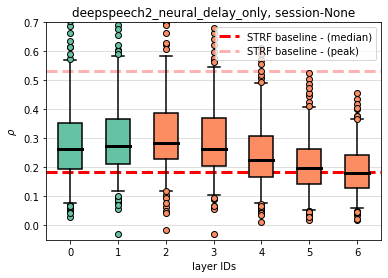

In [10]:
session = 200206
threshold = 0.1
normalized_list = [False]#, True]
delta_corr_list = [False]#, True]
bin_width = 20
delay = 0
save_fig = False
y_axis_lim = 0.7

identifier = ''
# model_name = 'wave2letter_modified'
# identifier = 'test7'
# identifier = 'test8'
# identifier = 'test9'

# identifier = 'normalizer2'

# identifier = 'RF_delayed_with_audio_zeropad'
# identifier = 'opt_delay_with_audio_zeropad'
# identifier = 'opt_delay_L6_D0'
# identifier = 'opt_delays_final'
# identifier = 'all_opt_delays'
identifier = 'neural_delay_only'


# model = 'wave2letter_modified_opt_delays'
# model = 'wave2letter_modified_RF_delayed'
# model = 'wave2letter_modified'
# model = 'wave2vec2_encoder'
# model = 'wave2vec2_feature_extractor'

# model_name = 'wave2vec'
# model_name = 'wave2vec2'
# model_name = 'speech2text'
# identifier = 'opt_delay'
# identifier = 'basic'
# identifier = 'RF_delay'
# identifier = 'neural_delay_only_l0'

model_name = 'deepspeech2'
# identifier = 'bi_lstm'

# model = 'deepspeech2_bi_lstm'
# model = 'speech2text_initial'
# model = 'speech2text'
# model = 's2t_updated'

# model = 'w2l_original'

# model = 'deepspeech2_rnn_1st_half'
# model = 'deepspeech2_rnn_2nd_half'
# model = 'wave2letter_modified_delay_zeropad'
# delay = 60
filler = ''
if identifier != '':
    filler = '_'
model_identifier = model_name + filler + identifier



for normalized in normalized_list:
    for delta_corr in delta_corr_list:

        corr_obj = analysis.Correlations(model_identifier)


        print(len(np.unique(corr_obj.get_all_sessions())))
        ax, layers_data = corr_obj.box_plot_correlations(
            # session,
            normalized=normalized, threshold=threshold, delta_corr=delta_corr, bin_width=bin_width,
            delay=delay, y_axis_lim=y_axis_lim
            )


        post_str = 'rho'
        if normalized:
            post_str = post_str + '_' + 'normalized'
        if delta_corr:
            post_str = 'delta_' + post_str
        fig_name = f"{model_identifier}_{post_str}.jpg"


        # NIPS_dir = 'C\:\Users\\ahmedb\\Desktop\\PhD\\Academic\\Makin\'s Lab\\auditory_cortex\\Results\\NIPS'
        saved_figures = os.path.join(results_dir, 'saved_figures', 'correlations')
        filepath = os.path.join(saved_figures, model_name, fig_name)
        if save_fig:
            plt.savefig(filepath)

In [7]:
corr_obj.data['layer'].unique()

array([0., 1., 2., 3., 4., 5., 6.])

In [16]:
print(f"Results for '{model_identifier}':")
for key, value in layers_data.items():
    print(f"Layer-{key}: {np.median(value):.3f}")

Results for 'wave2vec2_neural_delay_only':
Layer-0: 0.169
Layer-1: 0.222
Layer-2: 0.246
Layer-3: 0.248
Layer-4: 0.255
Layer-5: 0.259
Layer-6: 0.225
Layer-7: 0.270
Layer-8: 0.263
Layer-9: 0.254
Layer-10: 0.244
Layer-11: 0.235
Layer-12: 0.219
Layer-13: 0.218
Layer-14: 0.208
Layer-15: 0.202
Layer-16: 0.195
Layer-17: 0.190
Layer-18: 0.174
Layer-19: 0.148


In [40]:
print(f"Results for '{model_identifier}':")
for key, value in layers_data.items():
    print(f"Layer-{key}: {np.median(value):.3f}")

Results for 'wave2letter_modified':
Layer-0: 0.095
Layer-1: 0.175
Layer-2: 0.195
Layer-3: 0.215
Layer-4: 0.221
Layer-5: 0.223
Layer-6: 0.231
Layer-7: 0.240
Layer-8: 0.225
Layer-9: 0.209
Layer-10: 0.190
Layer-11: 0.164


### Analyzing optimal delays...

In [8]:
print(f"Mean optimal delays \n for '{model_identifier}', :")
corr_obj.get_selected_data(
            # layer=6,
            # session=200206,
            bin_width=20, delay=0, N_sents=499, threshold=0.1
        ).groupby(['layer'], as_index=False).mean()['opt_delays']

Mean optimal delays 
 for 'wave2vec_neural_delay_only', :


0     62.682119
1     38.443709
2     35.894040
3     35.927152
4     35.960265
5     37.019868
6     37.284768
7     35.364238
8     33.973510
9     34.337748
10    35.165563
11    35.496689
12    36.225166
13    37.317881
14    40.761589
15    42.682119
16    42.185430
17    44.271523
18    45.860927
Name: opt_delays, dtype: float64

In [20]:
select_data = corr_obj.get_selected_data(
            layer=6, bin_width=20, delay=0, threshold=0.1, N_sents=499
        ).groupby(['session'], as_index=False).mean()

sessions = select_data['session'].unique()

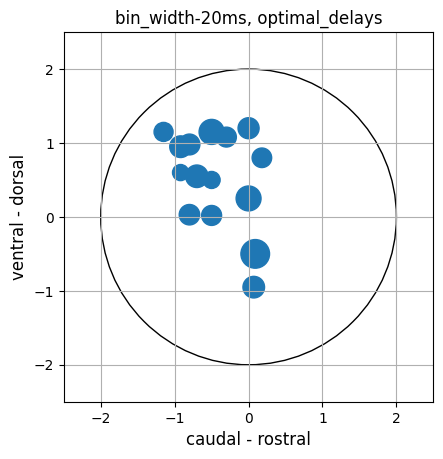

In [27]:
s = 5
opt_delays = []

x_coordinates = []
y_coordinates = []
peak_layers = []
peak_median_corr = []   
for session in sessions:
    opt_delays.append(select_data.loc[select_data['session']==session, ['opt_delays']]*s)
    c_x, c_y = session_to_coordinates[int(session)]
    x_coordinates.append(c_x)
    y_coordinates.append(c_y)

    # print(f"session: {session}, opt_delay: {opt_delay}")
fig, ax = plt.subplots()
fontsize = 12
scatt = ax.scatter(
            x_coordinates, y_coordinates, s=opt_delays, 
            # c=peak_layers, cmap='magma', vmin=0, vmax= num_layers, 
        )
# formating plot and adding colorbar
# adding background circle
circle = plt.Circle((0,0),2, fill=False)
ax.set_aspect(1)
ax.add_artist(circle)
ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
ax.set_title(f"bin_width-{bin_width}ms, optimal_delays", fontsize=fontsize)
ax.set_xlabel('caudal - rostral', fontsize=fontsize)
ax.set_ylabel('ventral - dorsal', fontsize=fontsize)
plt.grid(True)
# plt.colorbar(scatt, ax=ax, label='layers')

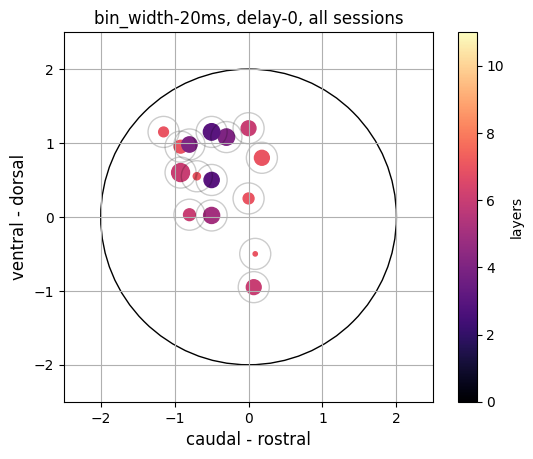

In [26]:
delay=0
corr_obj.plot_topographical_peaks(
        # unit_circles=False,
        # sessions=c_LH_sessions,
        bin_width=20,
        normalized=False,
        delay=delay,
        alpha=0.2,
        # threshold=0.05
        )

### combining corr data 

In [60]:
results_dir = os.path.join(results_dir, 'cross_validated_correlations')

In [61]:
model = 'wave2vec2_encoder'
filename = model + '_corr_results.csv'
# model = 'wave2vec2_feature_extractor'
path = os.path.join(results_dir, filename)
wave2vec2_encoder = pd.read_csv(path)

model = 'wave2vec2_feature_extractor'
filename = model + '_corr_results.csv'

path = os.path.join(results_dir, filename)
wave2vec2_extractor = pd.read_csv(path)

In [63]:
# wave2vec2_encoder

wave2vec2_encoder.loc[:,'layer'] = wave2vec2_encoder.loc[:,'layer'] + 7

In [65]:
wave2vec2_encoder['layer'].unique()

array([ 7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [66]:
result = pd.concat([wave2vec2_extractor, wave2vec2_encoder])

In [67]:
path = os.path.join(results_dir, 'wave2vec2_corr_results.csv')
result.to_csv(path)

In [17]:
path = os.path.join(results_dir, 'deepspeech2_L1_corr_results.csv')
deepspeech2_l1 = pd.read_csv(path)


path = os.path.join(results_dir, 'deepspeech2_L0_corr_results.csv')
deepspeech2_l0 = pd.read_csv(path)

In [18]:
deepspeech2_l1

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents
0,180420.0,1.0,0.0,20.0,0.0,0.142024,-0.012356,-0.007053,499.0
1,180420.0,1.0,1.0,20.0,0.0,0.151993,-0.012231,-0.024643,499.0
2,180420.0,1.0,2.0,20.0,0.0,0.151456,-0.013173,-0.024972,499.0
3,180420.0,1.0,3.0,20.0,0.0,0.150721,-0.012784,-0.025712,499.0
4,180420.0,1.0,4.0,20.0,0.0,0.151033,-0.012603,-0.025199,499.0
...,...,...,...,...,...,...,...,...,...
1914,200206.0,1.0,59.0,20.0,0.0,0.450744,0.397145,0.503795,499.0
1915,200206.0,1.0,60.0,20.0,0.0,0.647454,0.621183,0.579529,499.0
1916,200206.0,1.0,61.0,20.0,0.0,0.465925,0.425461,0.445747,499.0
1917,200206.0,1.0,62.0,20.0,0.0,0.672850,0.648476,0.550849,499.0


In [9]:
path = os.path.join(results_dir, 'deepspeech2_bi_lstm_corr_results.csv')
deepspeech2 = pd.read_csv(path)

In [12]:
deepspeech2.loc[:,'layer'] = deepspeech2.loc[:,'layer'] + 2

In [14]:
deepspeech2['layer'].unique()

array([2., 3., 4., 5., 6.])

In [19]:
deepspeech2_l0

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents
0,180420.0,0.0,0.0,20.0,0.0,0.182340,-0.007919,-0.006869,499.0
1,180420.0,0.0,1.0,20.0,0.0,0.181787,-0.013145,-0.024344,499.0
2,180420.0,0.0,2.0,20.0,0.0,0.181585,-0.012996,-0.024175,499.0
3,180420.0,0.0,3.0,20.0,0.0,0.181666,-0.009802,-0.025186,499.0
4,180420.0,0.0,4.0,20.0,0.0,0.182772,-0.008815,-0.024446,499.0
...,...,...,...,...,...,...,...,...,...
1914,200206.0,0.0,59.0,20.0,0.0,0.459551,0.385464,0.506141,499.0
1915,200206.0,0.0,60.0,20.0,0.0,0.658207,0.622691,0.579739,499.0
1916,200206.0,0.0,61.0,20.0,0.0,0.451451,0.412032,0.447033,499.0
1917,200206.0,0.0,62.0,20.0,0.0,0.688227,0.658601,0.550849,499.0


In [20]:
result = pd.concat([deepspeech2_l0, deepspeech2_l1, deepspeech2])

In [22]:
path = os.path.join(results_dir, 'deepspeech2_bi_lstm_corr_results.csv')
result.to_csv(path)

### analyzing STRF model

In [6]:
session = 200206
threshold = 0.1
bin_width = 20
delay = 0
N_sents = 499
column = 'test_cc_raw'

In [9]:
filename = 'STRF_corr_RidgeCV.npy'
# path = os.path.join(config.results_dir, config.corr_sub_dir, filename)
file_path = os.path.join(results_dir, filename)
baseline_corr = np.load(file_path)

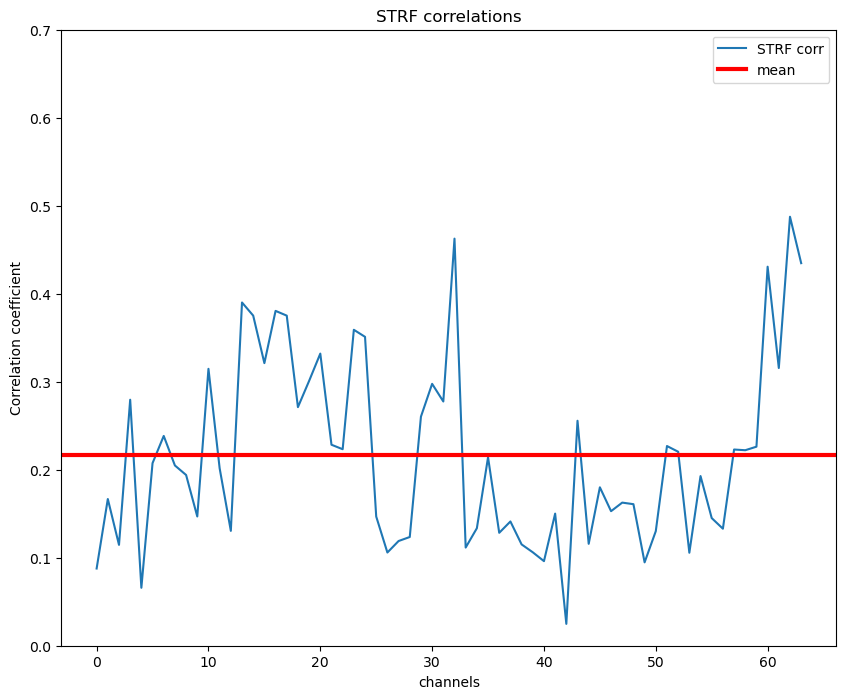

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(baseline_corr, label='STRF corr')
plt.title("STRF correlations")
plt.xlabel("channels")
plt.ylabel("Correlation coefficient")
plt.ylim([0,0.7])
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, label='mean')
# plt.axhline(np.max(baseline_corr), c='gray', alpha=0.5,linewidth=5, label='peak')


plt.legend(loc='best')

In [3]:
filename = 'STRF_corr_elasticNetCV.npy'
path = os.path.join(config.results_dir, config.corr_sub_dir, filename)
baseline_corr = np.load(path)

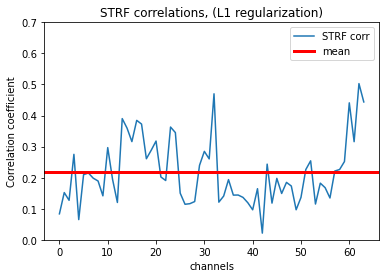

In [17]:
plt.plot(baseline_corr, label='STRF corr')
plt.title("STRF correlations, (L1 regularization)")
plt.xlabel("channels")
plt.ylabel("Correlation coefficient")
plt.ylim([0,0.7])
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, label='mean')
# plt.axhline(np.max(baseline_corr), c='gray', alpha=0.5,linewidth=5, label='peak')


plt.legend(loc='best')

In [5]:
np.mean(baseline_corr)

0.2169307859864385

### results for NIPS

In [12]:
# model_name = 'wave2letter'
# # # results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
# # filename = f"{model_name}_corr_results.csv"
# filename = 'c_w2l_correlations.csv'
# file_path = os.path.join(results_dir, filename)

# corr_obj = analysis.correlations()
session = 200206
threshold = 0.1
normalized = True
delta_corr = False
bin_width = 20

model = 'wave2letter_modified'
# model = 'wave2vec2'
# model = 'speech2text_initial'
# model = 'w2l_original'

corr_obj = analysis.correlations(model)

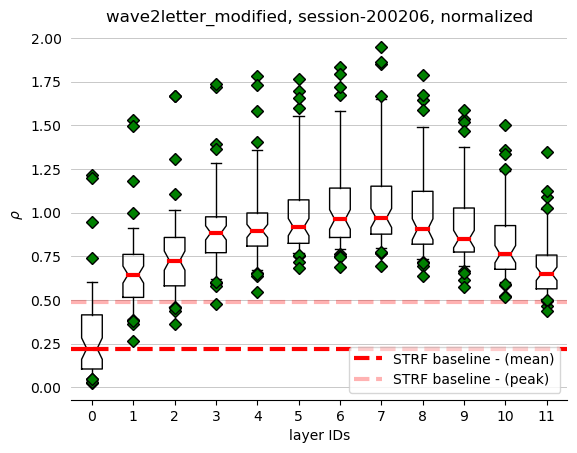

In [7]:
session = 200206
threshold = 0.1
normalized = True
delta_corr = False

ax = corr_obj.box_plot_correlations(session, normalized=normalized, threshold=threshold, delta_corr=delta_corr)

extra_axis_parameters = {
    'width=\\figwidth',
    'height=\\figheight',
    'every x tick label/.append style={rotate=90}',
    'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
}
tpl_save(
    filepath=os.path.join(results_dir, 'saved_figures', 'correlations', "correlations.tex"),
    extra_axis_parameters=extra_axis_parameters,
    tex_relative_path_to_data='pngs',
    extra_lines_start={
        '\\providecommand{\\figwidth}{5.7in}%',
        '\\providecommand{\\figheight}{2.0in}%',
        '\\providecommand{\\thisXticklabelopacity}{1.0}%',
    },
)



0.10639355370350263


C:\Users\ahmedb\AppData\Local\Temp\ipykernel_20832\2367577541.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


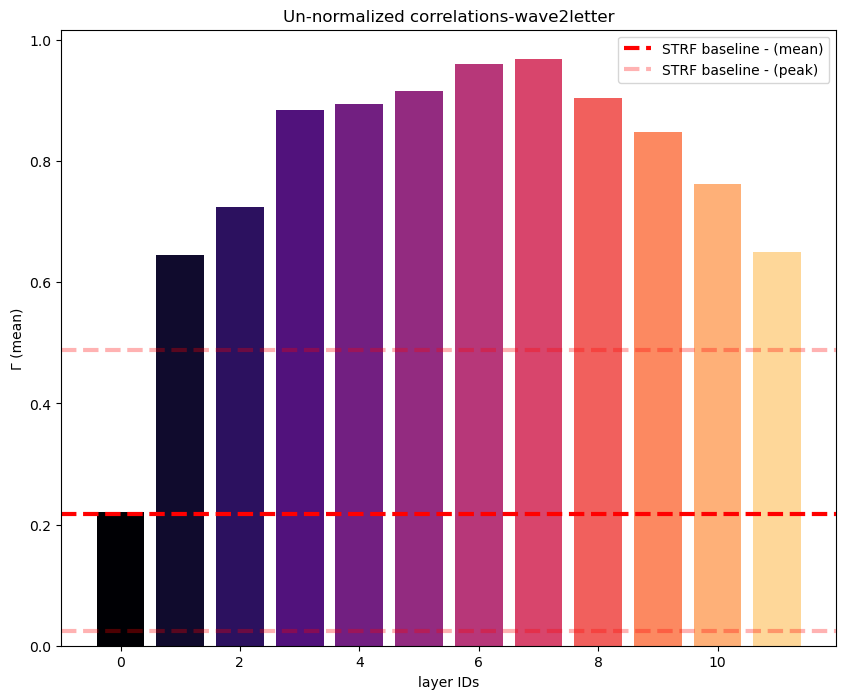

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
column = 'normalized_test_cc'
summary = corr_obj.summarize(session=session,
                        threshold=0.1,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

median = summary['50%']
std = summary['std']
max = summary['max']
import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(median.shape[0])/median.shape[0])
plt.bar(x=np.arange(median.shape[0]), height=median, color=colors)
# plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

# plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### plotting topographical bar plots

In [2]:
session = 200206
threshold = 0.1
normalized = True
delta_corr = False
bin_width = 20
delay = 0
N_sents = 499

model = 'wave2letter_modified'
# model = 'wave2vec2'
# model = 'speech2text_initial'
# model = 'w2l_original'

corr_obj = analysis.correlations(model)

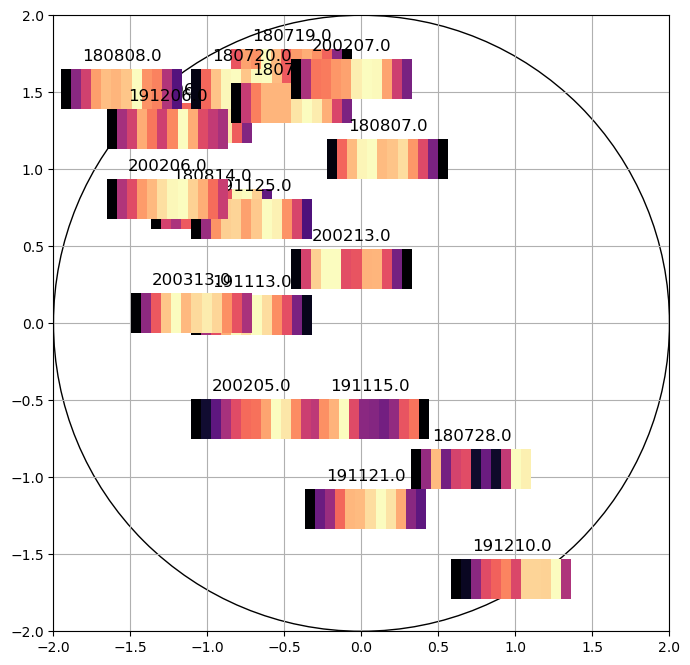

In [3]:
corr_obj.topographic_bar_plots(figsize=8)

### plotting topological peaks

In [3]:
session = 200206
threshold = 0.1
normalized = True
delta_corr = False
bin_width = 20
delay = 0
N_sents = 499

model = 'wave2letter_modified'
# model = 'wave2vec2'
# model = 'speech2text_initial'
# model = 'w2l_original'

corr_obj = analysis.correlations(model)

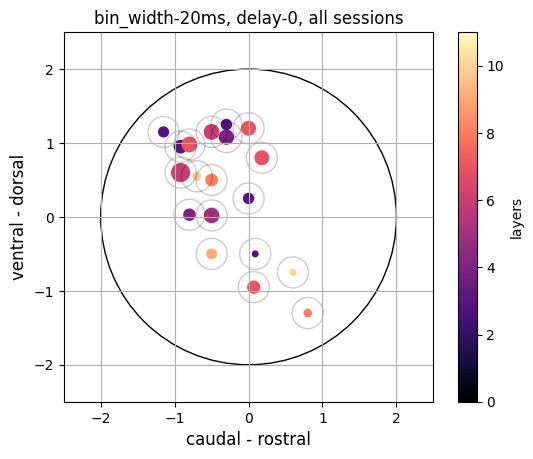

In [8]:
corr_obj.plot_topographical_peaks(
        # unit_circles=False,
        # sessions=c_LH_sessions,
        bin_width=20,
        normalized=False,
        alpha=0.2
        )

fig_name = f"topographical_peaks_all_sessions_20ms.tex"
extra_axis_parameters = {
    'width=\\figwidth',
    'height=\\figheight',
    'every x tick label/.append style={rotate=90}',
    'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
}
tpl_save(
    filepath=os.path.join(results_dir, 'saved_figures', 'topographical', fig_name),
    extra_axis_parameters=extra_axis_parameters,
    tex_relative_path_to_data='pngs',
    extra_lines_start={
        '\\providecommand{\\figwidth}{5.7in}%',
        '\\providecommand{\\figheight}{2.0in}%',
        '\\providecommand{\\thisXticklabelopacity}{1.0}%',
    },
)

#### defining functions

In [95]:
def plot_topographical_peaks(
            sessions = None,
            bin_width = 20,
            delay = 0,
            ax = None,
            threshold = 0.1,
            normalized = False,
            fontsize = 12,
            N_sents = 499
            
        ):


    if ax is None:
        fig, ax = plt.subplots()
    if normalized:
        norm = 'normalized'
        column = 'normalized_test_cc'
    else:
        norm = ''
        column = 'test_cc_raw'


    x_coordinates = []
    y_coordinates = []
    peak_layers = []
    peak_median_corr = []

    scale_size = 500
    if sessions is None:
        sessions = corr_obj.get_all_sessions()
    num_layers = len(corr_obj.get_all_layers('200206'))

    for session in sessions:
        select_data = corr_obj.get_session_data(
            session, threshold=threshold, bin_width=bin_width, delay=delay, N_sents=N_sents
        )
        if not select_data.empty:
            median_across_channels = select_data.groupby('layer', as_index=False).median()
            id = median_across_channels.idxmax()[column]

            # plots 'dot' with size (area) propotional to correlations,
            # and color as function of peak layer
            peak_median_corr.append(median_across_channels.loc[id, column]*scale_size)
            peak_layers.append(median_across_channels.loc[id, 'layer'])
            c_x, c_y = session_to_coordinates[int(session)]
            x_coordinates.append(c_x)
            y_coordinates.append(c_y)

    
    # adding circles of unit area..
    unit_areas = scale_size*np.ones(len(x_coordinates))
    ax.scatter(x_coordinates, y_coordinates, s=unit_areas,
                facecolor='none', edgecolor='black'
            )
    scatt = ax.scatter(
                x_coordinates, y_coordinates, s=peak_median_corr, 
                c=peak_layers, cmap='magma', vmin=0, vmax= num_layers-1, 
            )
    
    # formating plot and adding colorbar
    # adding background circle
    circle = plt.Circle((0,0),2, fill=False)
    ax.set_aspect(1)
    ax.add_artist(circle)
    ax.set_xlim([-2.5,2.5])
    ax.set_ylim([-2.5,2.5])
    ax.set_title(f"bin_width-{bin_width}ms, delay-{delay}", fontsize=fontsize)
    ax.set_xlabel('caudal - rostral', fontsize=fontsize)
    ax.set_ylabel('ventral - dorsal', fontsize=fontsize)
    plt.grid(True)
    plt.colorbar(scatt, ax=ax, label='layers')
            
            

            
        



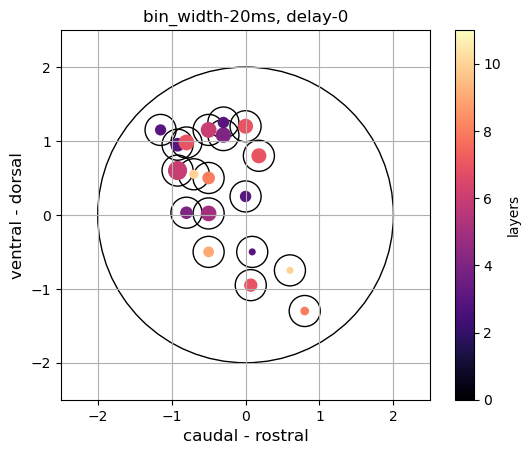

In [96]:
plot_topographical_peaks()

### \box and whisker plot

Baseline median: 0.183


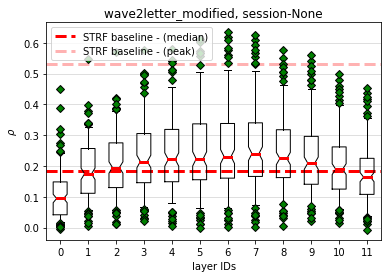

In [4]:
session = 200206
threshold = 0.1
normalized = False
delta_corr = False
bin_width = 20

model = 'wave2letter_modified'
# model = 'wave2vec2_encoder'
# model = 'wave2vec2_feature_extractor'
# model = 'wave2vec2'
# model = 'deepspeech2_rnn_1st_half'
# model = 'deepspeech2_rnn_2nd_half'
# model = 'deepspeech2_bi_lstm'
# model = 'speech2text_initial'
# model = 'speech2text'
# model = 's2t_updated'

# model = 'w2l_original'

corr_obj = analysis.Correlations(model)

post_str = ''
if normalized:
    post_str = '_normalized'
if delta_corr:
    post_str = post_str + '_delta_rho'
fig_name = f"{model}_correlations{post_str}.tex"

ax, layers_data = corr_obj.box_plot_correlations(
    # session,
    normalized=normalized, threshold=threshold, delta_corr=delta_corr, bin_width=bin_width
    )

# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(results_dir, 'saved_figures', 'correlations', fig_name),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     extra_lines_start={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )

In [5]:
for i in range(len(layers_data)):
    print(f"layer: {i}, median: {np.median(layers_data[i]):.2f}", end=', ')
    print(f"max: {np.max(layers_data[i]):.2f}")

layer: 0, median: 0.09, max: 0.45
layer: 1, median: 0.17, max: 0.55
layer: 2, median: 0.20, max: 0.57
layer: 3, median: 0.21, max: 0.58
layer: 4, median: 0.22, max: 0.58
layer: 5, median: 0.22, max: 0.61
layer: 6, median: 0.23, max: 0.63
layer: 7, median: 0.24, max: 0.63
layer: 8, median: 0.22, max: 0.58
layer: 9, median: 0.21, max: 0.56
layer: 10, median: 0.19, max: 0.50
layer: 11, median: 0.16, max: 0.45


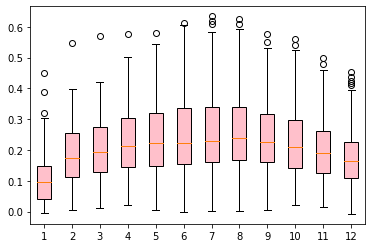

In [35]:
bplot = plt.boxplot(layers_data.values(), patch_artist=True)
for box in bplot['boxes']:
    # box.set_fillstyle('full')
    # box.set_markeredgecolor('pink')
    box.set_facecolor('pink')
plt.show()

In [12]:
bplot.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [129]:
baseline['normalizer'] = np.zeros(baseline.shape[0])

In [138]:
baseline_corrected = []
for id in baseline.index:
    normalizer = corr_obj.data[
        (corr_obj.data['session']==baseline.at[id, 'session']) &\
        (corr_obj.data['bin_width']==baseline.at[id, 'bin_width']) &\
        (corr_obj.data['delay']==baseline.at[id, 'delay']) &\
        (corr_obj.data['channel']==baseline.at[id, 'channel'])
    ].head(1)['normalizer']
    
    baseline.at[id, 'normalizer'] = normalizer

baseline['corrected'] = baseline['strf_corr']/baseline['normalizer']

threshold = 0.1
print(f"Median {baseline[baseline['normalizer']>=threshold]['corrected'].median():.2f}")
print(f"Max {baseline[baseline['normalizer']>=threshold]['corrected'].max():.2f}")

Median 0.69
Max 1.86


In [140]:
threshold = 0.1
column = 'strf_corr'
print(f"Median {baseline[baseline['normalizer']>=threshold][column].median():.2f}")
print(f"Max {baseline[baseline['normalizer']>=threshold][column].max():.2f}")

Median 0.15
Max 0.53


In [139]:
corr_obj.baseline_corr['strf_corr'].median()

0.013740808760290251

In [142]:
num_alphas = 8
np.logspace(-2, 5, num_alphas)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

In [134]:
print(f"Median: {baseline['corrected'].median():.2f}", end=', ')
print(f"max: {baseline['corrected'].max():.2f}")

Median: 0.62, max: inf


In [125]:
id = 0
corr_obj.data[
        (corr_obj.data['session']==baseline.at[id, 'session']) &\
        (corr_obj.data['bin_width']==baseline.at[id, 'bin_width']) &\
        (corr_obj.data['delay']==baseline.at[id, 'delay']) &\
        (corr_obj.data['channel']==baseline.at[id, 'channel'])
    ].head(1)['normalizer']

92112    0.18326
Name: normalizer, dtype: float64

In [123]:
baseline

,session,channel,bin_width,delay,strf_corr
0,200206.0,0.0,20.0,0.0,0.118883
1,200206.0,1.0,20.0,0.0,0.197218
2,200206.0,2.0,20.0,0.0,0.154856
3,200206.0,3.0,20.0,0.0,0.331080
4,200206.0,4.0,20.0,0.0,0.087961
...,...,...,...,...,...
2437,190801.0,59.0,20.0,0.0,0.013906
2438,190801.0,60.0,20.0,0.0,0.018908
2439,190801.0,61.0,20.0,0.0,0.019551
2440,190801.0,62.0,20.0,0.0,0.007693


In [6]:
session = 200206
threshold = 0.1
normalized = True
delta_corr = False
bin_width = 20
delay = 0
N_sents = 499

model = 'wave2letter_modified'
# model = 'wave2vec2'
# model = 'speech2text_initial'
# model = 'w2l_original'

corr_obj = analysis.correlations(model)

In [16]:
select_data = corr_obj.data[
    (corr_obj.data['session']==float(session)) & \
    (corr_obj.data['bin_width']==bin_width) & \
    (corr_obj.data['delay']==delay) & \
    (corr_obj.data['N_sents']>=N_sents) &\
    (corr_obj.data['normalizer'] >= threshold)     
    ]

0.10639355370350263


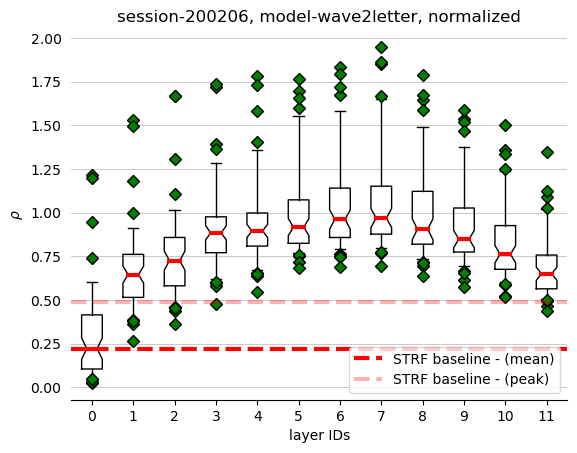

In [10]:
normalized = True
if normalized:
    norm = 'normalized'
    column = 'normalized_test_cc'
else:
    norm = ''
    column = 'test_cc_raw'

layer_spread = {}

layer_ids = select_data['layer'].unique()
for layer in layer_ids:
    layer_spread[int(layer)] =  np.array(select_data[select_data['layer']==layer][column])
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
green_diamonds = dict(marker='D', markerfacecolor = 'g')
red_lines = dict(color='r', linewidth=3)  
ax1.boxplot(layer_spread.values(), positions = np.arange(1, len(layer_spread.keys())+1), labels=layer_spread.keys(),
            whis=[5,95], notch=True, flierprops = green_diamonds, medianprops=red_lines)

ax1.set_title(f"session-{session}, model-{model_name}, {norm}")
ax1.set_xlabel('layer IDs')
ax1.set_ylabel("$\\rho$")
# remove borders
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
# remove y-axis tick marsks
ax1.yaxis.set_ticks_position('none')
# add major grid lines in y-axis
ax1.grid(color='grey', axis='y', linestyle='-', linewidth = 0.6, alpha=0.5)


# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
# plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')


In [50]:
column = 'test_cc_raw'

select_data = corr_obj.data[
    # (corr_obj.data['session']==float(session)) & \
    (corr_obj.data['bin_width']==bin_width) & \
    (corr_obj.data['delay']==delay) & \
    (corr_obj.data['N_sents']>=N_sents) &\
    (corr_obj.data['normalizer'] >= threshold)     
    ]

In [39]:
select_data.shape

(756, 10)

In [8]:
layer_spread_diff = {}
layer_ids = select_data['layer'].unique()
channel_ids = select_data['channel'].unique()
for layer in layer_ids:
    differences = []
    
    for ch in channel_ids:
        ss = select_data[(select_data['layer']==layer) & (select_data['channel']==ch)][column]
        if not ss.empty:
            differences.append(ss - baseline_corr[int(ch)])
    layer_spread_diff[int(layer)] = np.array(differences)



    # layer_spread[int(layer)] =  np.array(select_data[select_data['layer']==layer][column])

In [28]:
normalized = False
if normalized:
    norm = 'normalized'
    column = 'normalized_test_cc'
else:
    norm = ''
    column = 'test_cc_raw'

layer_spread = {}
layer_ids = select_data['layer'].unique()
# channel_ids = select_data['channel'].unique()
for layer in layer_ids:
    differences = []
    ids = select_data[select_data['layer']==layer].index
    for id in ids:

        channel_corr =  select_data.loc[id, column]
        ch = int(select_data.loc[id, 'channel'])
        baseline = baseline_corr[ch]
        if normalized:
            baseline = baseline / select_data.loc[id, 'normalizer']
        differences.append(channel_corr - baseline)

    layer_spread[int(layer)] = np.array(differences)


        # ss = select_data[(select_data['layer']==layer) & (select_data['channel']==ch)][column]
        # if not ss.empty:
        #     differences.append(ss - baseline_corr[int(ch)])


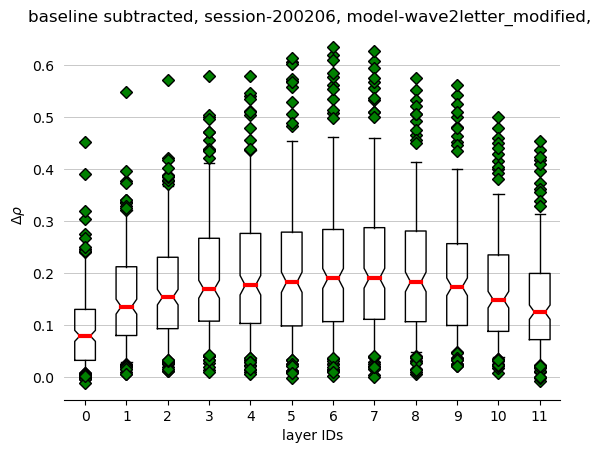

In [52]:
# non delta \rho

normalized = False
if normalized:
    norm = 'normalized'
    column = 'normalized_test_cc'
else:
    norm = ''
    column = 'test_cc_raw'

layer_spread = {}
layer_ids = select_data['layer'].unique()
# channel_ids = select_data['channel'].unique()
for layer in layer_ids:
    differences = []
    ids = select_data[select_data['layer']==layer].index
    # select_data.loc[id, column]
    # ids = select_data[select_data['layer']==layer].index
    layer_spread[int(layer)] = np.array(select_data.loc[ids, column]).squeeze()
    # for id in ids:

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
green_diamonds = dict(marker='D', markerfacecolor = 'g')
red_lines = dict(color='r', linewidth=3)  
ax1.boxplot(layer_spread.values(), positions = np.arange(1, len(layer_spread.keys())+1), \
            labels=layer_spread.keys(),\
            whis=[5,95], notch=True, flierprops = green_diamonds, medianprops=red_lines)

ax1.set_title(f"baseline subtracted, session-{session}, model-{model}, {norm}")
ax1.set_xlabel('layer IDs')
ax1.set_ylabel("$\Delta$$\\rho$")
# remove borders
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
# remove y-axis tick marsks
ax1.yaxis.set_ticks_position('none')
# add major grid lines in y-axis
ax1.grid(color='grey', axis='y', linestyle='-', linewidth = 0.6, alpha=0.5)

In [43]:
layer = 0.0
ids = select_data[select_data['layer']==layer].index
dd = np.array(select_data.loc[ids, column]).squeeze()


In [44]:
dd.shape

(211,)

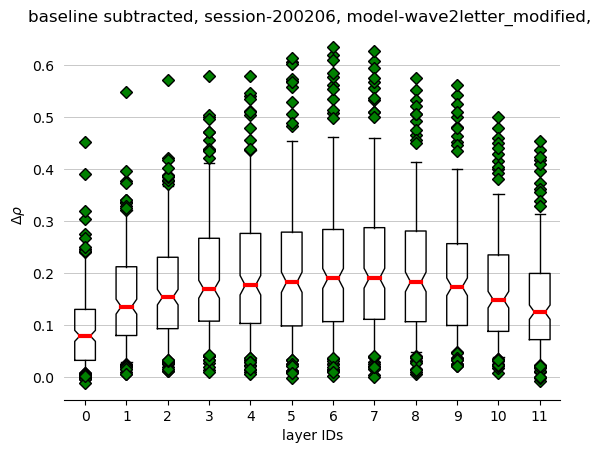

In [46]:
        
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
green_diamonds = dict(marker='D', markerfacecolor = 'g')
red_lines = dict(color='r', linewidth=3)  
ax1.boxplot(layer_spread.values(), positions = np.arange(1, len(layer_spread.keys())+1), \
            labels=layer_spread.keys(),\
            whis=[5,95], notch=True, flierprops = green_diamonds, medianprops=red_lines)

ax1.set_title(f"baseline subtracted, session-{session}, model-{model}, {norm}")
ax1.set_xlabel('layer IDs')
ax1.set_ylabel("$\Delta$$\\rho$")
# remove borders
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
# remove y-axis tick marsks
ax1.yaxis.set_ticks_position('none')
# add major grid lines in y-axis
ax1.grid(color='grey', axis='y', linestyle='-', linewidth = 0.6, alpha=0.5)

In [27]:
ids = select_data[select_data['layer']==0].index

In [28]:
select_data.loc[ids[0], column]

0.0639015691320329

In [30]:
ch = int(select_data.loc[ids[0], 'channel'])


In [37]:
baseline = baseline_corr[ch]

In [38]:
baseline = baseline / select_data.loc[ids[0], 'normalizer']

In [39]:
baseline

0.4787147227495388

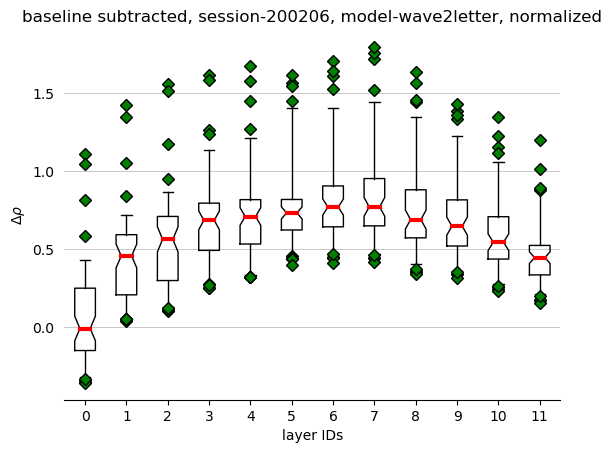

In [124]:
# normalized = True
# if normalized:
#     norm = 'normalized'
#     column = 'normalized_test_cc'
# else:
#     norm = ''
#     column = 'test_cc_raw'

# layer_spread_diff = {}
# layer_ids = select_data['layer'].unique()
# channel_ids = select_data['channel'].unique()
# for layer in layer_ids:
#     differences = []
#     for ch in channel_ids:
#         ss = select_data[(select_data['layer']==layer) & (select_data['channel']==ch)][column]
#         if not ss.empty:
#             differences.append(ss - baseline_corr[int(ch)])
#         layer_spread_diff[int(layer)] = np.array(differences).squeeze()


        
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
green_diamonds = dict(marker='D', markerfacecolor = 'g')
red_lines = dict(color='r', linewidth=3)  
ax1.boxplot(layer_spread_diff.values(), positions = np.arange(1, len(layer_spread_diff.keys())+1), \
            labels=layer_spread_diff.keys(),\
            whis=[5,95], notch=True, flierprops = green_diamonds, medianprops=red_lines)

ax1.set_title(f"baseline subtracted, session-{session}, model-{model_name}, {norm}")
ax1.set_xlabel('layer IDs')
ax1.set_ylabel("$\Delta$$\\rho$")
# remove borders
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
# remove y-axis tick marsks
ax1.yaxis.set_ticks_position('none')
# add major grid lines in y-axis
ax1.grid(color='grey', axis='y', linestyle='-', linewidth = 0.6, alpha=0.5)

# add STRF baseline
# plt.ylabel(' (mean)')
# plt.xlabel("layer IDs")
# plt.title(f"Un-normalized correlations-{model_name}")
# plt.show()


# # plotting the baseline...
# plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
# print(np.std(baseline_corr))
# plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
# # plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
# plt.legend(loc='best')

### analyzing whisper

In [8]:
model_name = 'whisper'
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


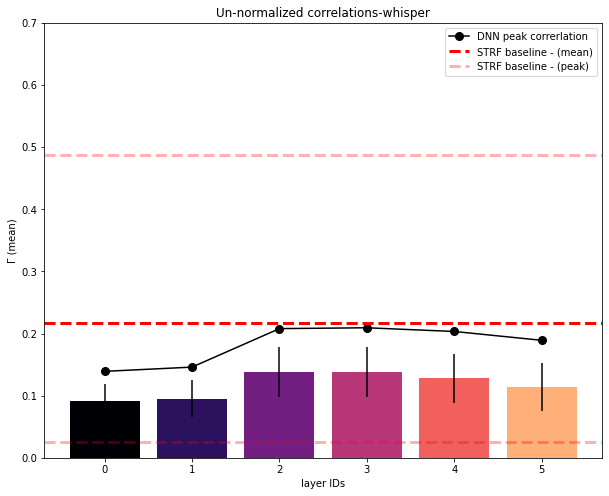

In [9]:
session = 200206
threshold = 0.1
bin_width = 20
delay = 0
N_sents = 499
column = 'test_cc_raw'

fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### analyzing wav2vec2

0.10639355370350263


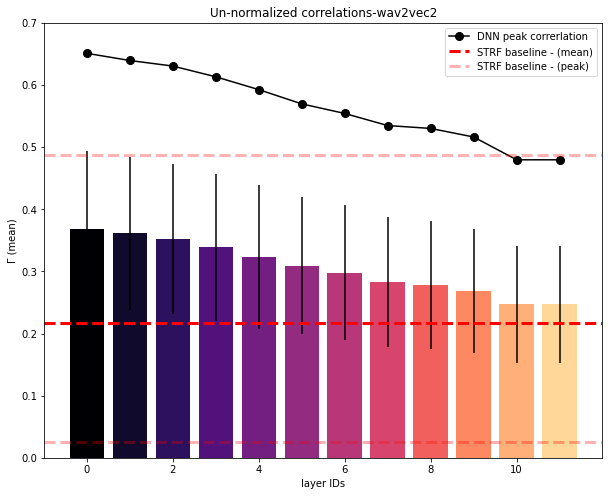

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [4]:
model_name = 'wave2vec2'
# results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


C:\Users\ahmedb\AppData\Local\Temp\ipykernel_18632\2502881191.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


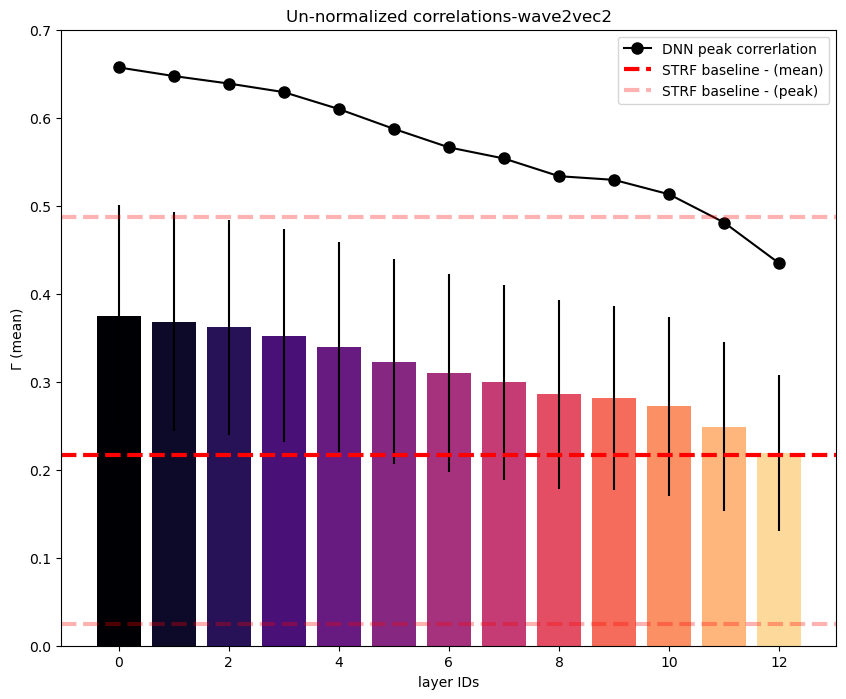

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

0.10639355370350263


C:\Users\ahmedb\AppData\Local\Temp\ipykernel_20832\1704734050.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


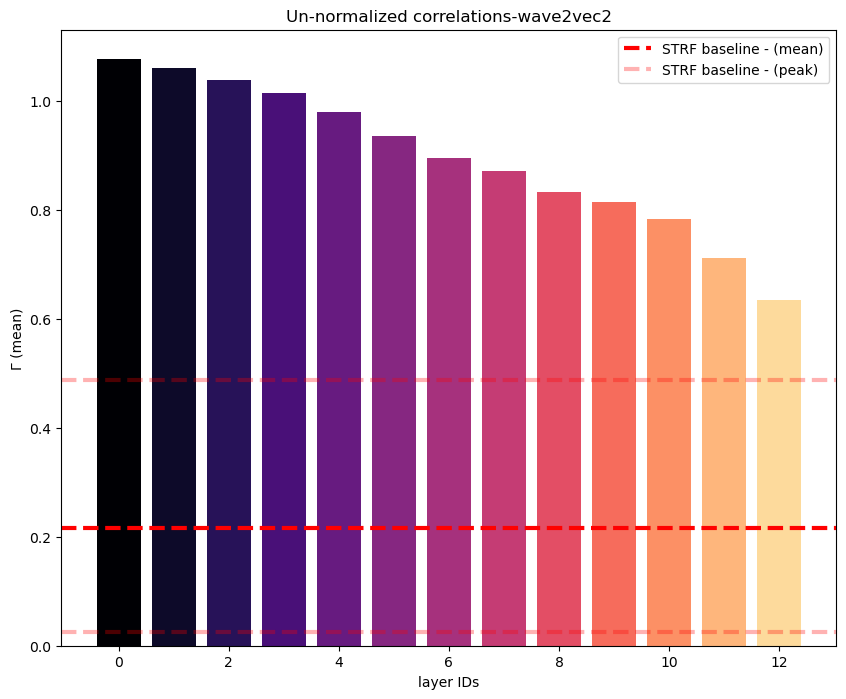

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
column = 'normalized_test_cc'
summary = corr_obj.summarize(session=session,
                        # threshold=0.1,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

median = summary['50%']
std = summary['std']
max = summary['max']
import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(median.shape[0])/median.shape[0])
plt.bar(x=np.arange(median.shape[0]), height=median, color=colors)
# plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

# plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [23]:
summary

,count,mean,std,min,25%,50%,75%,max
layer,,,,,,,,
0.0,64.0,1.334930,1.202900,0.784206,0.991270,1.077530,1.287027,10.510459
1.0,64.0,1.311994,1.175576,0.757286,0.971688,1.060556,1.265222,10.268691
2.0,64.0,1.296947,1.218015,0.746088,0.945803,1.039962,1.243199,10.594305
3.0,64.0,1.255734,1.133358,0.719705,0.927444,1.014967,1.210650,9.876241
4.0,64.0,1.207189,1.098812,0.687742,0.898320,0.980043,1.152950,9.574897
5.0,64.0,1.135601,0.974844,0.633431,0.844229,0.935325,1.104702,8.530379
6.0,64.0,1.084282,0.903491,0.616394,0.818278,0.895368,1.059627,7.939400
7.0,64.0,1.059958,0.984054,0.585741,0.773361,0.871288,1.021182,8.577510
8.0,64.0,0.988594,0.797469,0.570030,0.745520,0.832543,0.972099,7.037504


In [39]:
select_data = corr_obj.data[
    (corr_obj.data['session']==float(session)) & \
    (corr_obj.data['bin_width']==bin_width) & \
    (corr_obj.data['delay']==delay) & \
    (corr_obj.data['N_sents']>=N_sents) &\
    (corr_obj.data['normalizer'] >= threshold)     
    ]

In [43]:
col_name = 'test_cc_raw'
col_name = 'normalized_test_cc'
select_data.groupby(['layer'])[col_name].describe()
# std = select_data.groupby(['layer'])[col_name].describe()['std']
# mean = select_data.groupby(['layer'])[col_name].describe()['mean']
# max = select_data.groupby(['layer'])[col_name].describe()['max']

,count,mean,std,min,25%,50%,75%,max
layer,,,,,,,,
0.0,63.0,1.189287,0.301404,0.784206,0.990907,1.074152,1.273175,2.092220
1.0,63.0,1.169825,0.299701,0.757286,0.966800,1.059359,1.254591,2.052707
2.0,63.0,1.149370,0.301914,0.746088,0.943526,1.035678,1.239270,2.034925
3.0,63.0,1.118900,0.295964,0.719705,0.924751,1.012948,1.203681,1.964988
4.0,63.0,1.074368,0.282142,0.687742,0.898173,0.979641,1.142666,1.896470
5.0,63.0,1.018224,0.263950,0.633431,0.840484,0.932257,1.101377,1.758371
6.0,63.0,0.975471,0.243897,0.616394,0.814790,0.888757,1.055251,1.678134
7.0,63.0,0.940632,0.240839,0.585741,0.773201,0.868912,1.018715,1.638919
8.0,63.0,0.892580,0.216095,0.570030,0.743297,0.828695,0.968129,1.567510


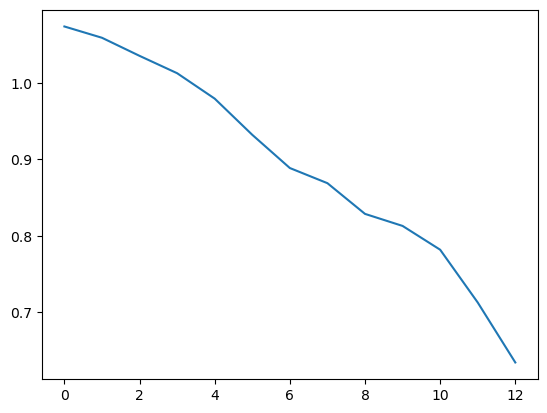

In [45]:
median = select_data.groupby(['layer'])[col_name].describe()['50%']
plt.plot(median)

In [40]:
select_data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
0,200206.0,0.0,0.0,20.0,0.0,0.268091,0.219214,0.184902,499.0,1.185567
1,200206.0,0.0,1.0,20.0,0.0,0.322614,0.289783,0.225907,499.0,1.282752
2,200206.0,0.0,2.0,20.0,0.0,0.282029,0.237547,0.135402,499.0,1.754383
3,200206.0,0.0,3.0,20.0,0.0,0.450300,0.417725,0.421867,499.0,0.990183
4,200206.0,0.0,4.0,20.0,0.0,0.227496,0.161741,0.124313,499.0,1.301080
...,...,...,...,...,...,...,...,...,...,...
827,200206.0,12.0,59.0,20.0,0.0,0.314074,0.247396,0.503795,499.0,0.491066
828,200206.0,12.0,60.0,20.0,0.0,0.442380,0.402141,0.576695,499.0,0.697319
829,200206.0,12.0,61.0,20.0,0.0,0.335660,0.283510,0.447033,499.0,0.634204
830,200206.0,12.0,62.0,20.0,0.0,0.479446,0.434592,0.551003,499.0,0.788730


### analyzing S2T

In [24]:
model_name = 'speech2text'
# results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
# filename = 'speech2text_testing_for_modified_code.csv'
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

C:\Users\ahmedb\AppData\Local\Temp\ipykernel_18632\2502881191.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


0.10639355370350263


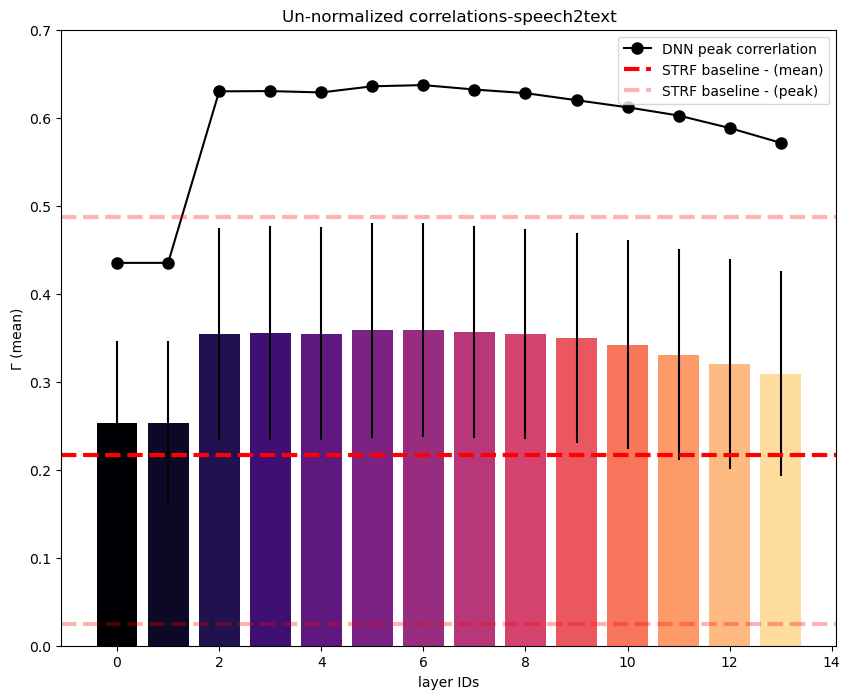

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### analyzing W2L (modified)

In [4]:

filename = 'c_mod_w2l_correlations.csv'
file_path = os.path.join(results_dir, filename)


In [5]:
corr_obj = analysis.correlations(file_path)

In [19]:
corr_obj.data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
0,200206.0,0.0,0.0,40.0,0.0,0.125167,0.125167,0.252484,500.0,0.495742
1,200206.0,0.0,1.0,40.0,0.0,0.100209,0.100209,0.305889,500.0,0.327600
2,200206.0,0.0,2.0,40.0,0.0,0.054731,0.054731,0.185928,500.0,0.294366
3,200206.0,0.0,3.0,40.0,0.0,0.113907,0.113907,0.553509,500.0,0.205790
4,200206.0,0.0,4.0,40.0,0.0,0.106597,0.106597,0.178577,500.0,0.596926
...,...,...,...,...,...,...,...,...,...,...
6511,200207.0,11.0,57.0,40.0,0.0,0.064903,0.064903,-0.024789,500.0,-2.618180
6512,200207.0,11.0,58.0,40.0,0.0,0.061948,0.061948,-0.019001,500.0,-3.260197
6513,200207.0,11.0,59.0,40.0,0.0,0.242730,0.242730,0.253595,500.0,0.957156
6514,200207.0,11.0,60.0,40.0,0.0,0.112211,0.112211,0.090153,500.0,1.244674


In [21]:
select_data = corr_obj.data[
    (corr_obj.data['session']==float(session)) & \
    (corr_obj.data['bin_width']==bin_width) & \
    (corr_obj.data['delay']==delay) & \
    (corr_obj.data['N_sents']>=N_sents) &\
    (corr_obj.data['normalizer'] >= threshold)     
    ]


In [22]:
select_data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc


In [23]:
corr_obj.data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
0,200206.0,0.0,0.0,40.0,0.0,0.125167,0.125167,0.252484,500.0,0.495742
1,200206.0,0.0,1.0,40.0,0.0,0.100209,0.100209,0.305889,500.0,0.327600
2,200206.0,0.0,2.0,40.0,0.0,0.054731,0.054731,0.185928,500.0,0.294366
3,200206.0,0.0,3.0,40.0,0.0,0.113907,0.113907,0.553509,500.0,0.205790
4,200206.0,0.0,4.0,40.0,0.0,0.106597,0.106597,0.178577,500.0,0.596926
...,...,...,...,...,...,...,...,...,...,...
6511,200207.0,11.0,57.0,40.0,0.0,0.064903,0.064903,-0.024789,500.0,-2.618180
6512,200207.0,11.0,58.0,40.0,0.0,0.061948,0.061948,-0.019001,500.0,-3.260197
6513,200207.0,11.0,59.0,40.0,0.0,0.242730,0.242730,0.253595,500.0,0.957156
6514,200207.0,11.0,60.0,40.0,0.0,0.112211,0.112211,0.090153,500.0,1.244674


In [ ]:

std = select_data.groupby(['layer'])[col_name].describe()['std']
mean = select_data.groupby(['layer'])[col_name].describe()['mean']
max = select_data.groupby(['layer'])[col_name].describe()['max']
return mean, std, max

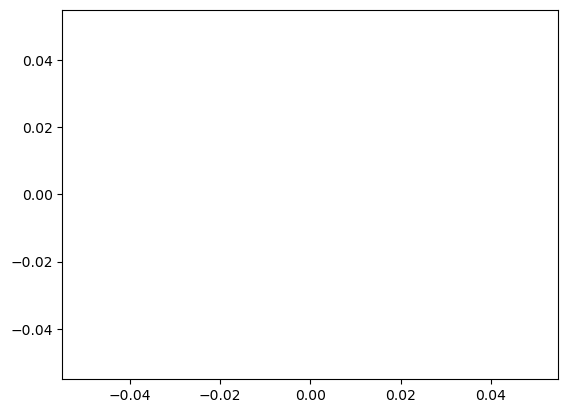

In [17]:
# fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        threshold=0.1,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=499,
                        col_name=column
                        )

cmap = mpl.colormaps.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.plot(mean)
plt.show()
# plt.plot(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
# plt.ylim([0, 0.7])
# plt.ylabel('\u0393 (mean)')
# plt.xlabel("layer IDs")
# plt.title("Un-normalized correlations - W2L")
# plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')
# # plt.savefig(os.path.join(saved_results, 'svg_files',f'correlations_plot_unnormalized.svg'))
# # saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/tikz_files'
# # extra_axis_parameters = {
# #     'width=\\figwidth',
# #     'height=\\figheight',
# #     'every x tick label/.append style={rotate=90}',
# #     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# # }
# # tpl_save(
# #     filepath=os.path.join(saved_results, f'correlations_plot_unnormalized.tex'),
# #     extra_axis_parameters=extra_axis_parameters,
# #     tex_relative_path_to_data='pngs',
# #     pre_tikzpicture_lines={
# #         '\\providecommand{\\figwidth}{5.7in}%',
# #         '\\providecommand{\\figheight}{2.0in}%',
# #         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
# #     },
# # )
# # plotting the baseline...
# plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
# print(np.std(baseline_corr))
# plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
# plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
# plt.legend(loc='best')

### w2l original 

In [33]:
model_name = 'w2l_original'
# results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


C:\Users\ahmedb\AppData\Local\Temp\ipykernel_18632\3937294264.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


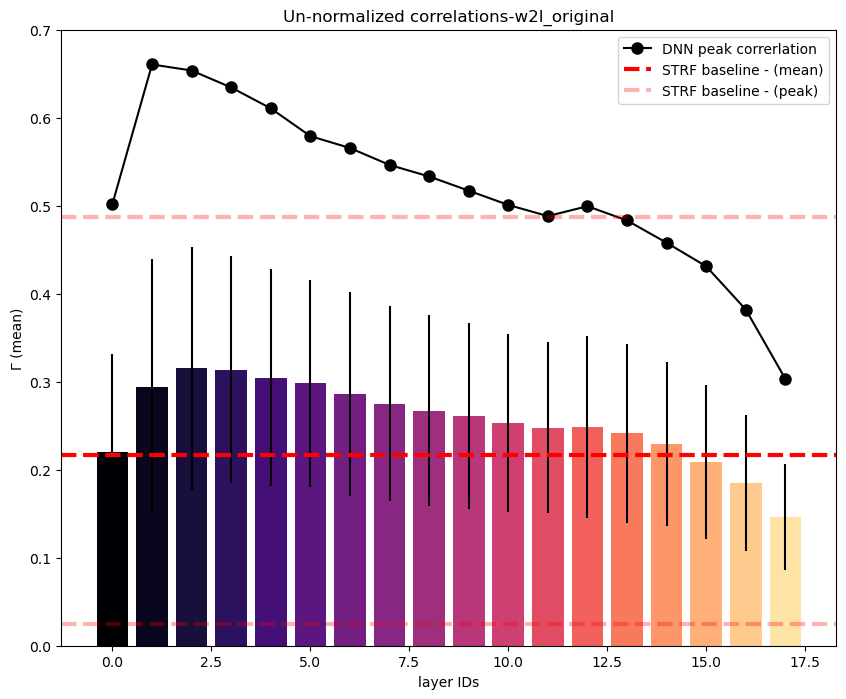

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=500,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### S2T initial

In [30]:
model_name = 'speech2text_initial'
# results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


C:\Users\ahmedb\AppData\Local\Temp\ipykernel_18632\1737774629.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


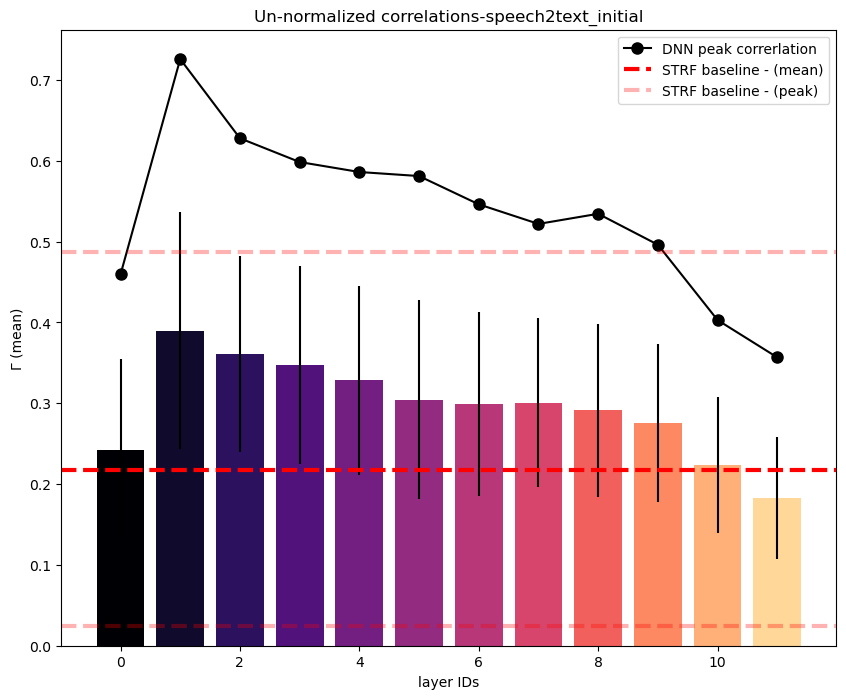

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
# column = 'normalized_test_cc'
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=40,
                        delay=delay,
                        N_sents=500,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
# plt.ylim([0, 0.8])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [ ]:
corr_obj = analysis.correlations()

### adding normalizer to S2T

In [2]:
w2l_obj = analysis.correlations()

In [31]:
ch=0

In [59]:
for ch in np.arange(64):
    norm = w2l_obj.data[
        (w2l_obj.data['channel']==ch) &\
        (w2l_obj.data['bin_width']==20) &\
        (w2l_obj.data['delay']==0) &\
        (w2l_obj.data['session']==200206)  
    ]['normalizer'].unique().item()


    indices = corr_obj.data[
        (corr_obj.data['session'] == 200206) &\
        (corr_obj.data['delay'] == 0) &\
        (corr_obj.data['bin_width'] == 40) &\
        (corr_obj.data['channel'] == ch)
                 ].index

    corr_obj.data.iloc[indices,9] = [norm]*len(indices)

In [61]:
corr_obj.data.to_csv(file_path, index=False)

In [33]:
ch = 0
corr_obj.data[
    (corr_obj.data['session'] == 200206) &\
    (corr_obj.data['delay'] == 0) &\
    (corr_obj.data['bin_width'] == 40) &\
    (corr_obj.data['channel'] == ch)
             ]['normalizer'] =  [w2l_obj.data[
    (w2l_obj.data['channel']==0) &\
    (w2l_obj.data['bin_width']==20) &\
    (w2l_obj.data['delay']==0) &\
    (w2l_obj.data['session']==200206)  
]['normalizer'].unique().item()]*corr_obj.data[
    (corr_obj.data['session'] == 200206) &\
    (corr_obj.data['delay'] == 0) &\
    (corr_obj.data['bin_width'] == 40) &\
    (corr_obj.data['channel'] == ch)
             ].shape[0]

/tmp/ipykernel_17935/3862511374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_obj.data[


In [45]:
indices

Int64Index([0, 64, 128, 192, 256, 320, 384, 448, 512, 576, 640, 704], dtype='int64')

In [52]:
corr_obj.data.iloc[indices,:] 

,Unnamed: 0,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc,normalizer,N_sents,normalized_test_cc
0,0,200206.0,0.0,0.0,40.0,0.0,0.311513,0.117389,0.144290,0.18326,500.0,0.117389
64,64,200206.0,1.0,0.0,40.0,0.0,0.321801,0.163754,0.231518,0.18326,500.0,0.163754
128,128,200206.0,2.0,0.0,40.0,0.0,0.279387,0.197370,0.206762,0.18326,500.0,0.197370
192,192,200206.0,3.0,0.0,40.0,0.0,0.267113,0.166666,0.200804,0.18326,500.0,0.166666
256,256,200206.0,4.0,0.0,40.0,0.0,0.250369,0.157234,0.184415,0.18326,500.0,0.157234
320,320,200206.0,5.0,0.0,40.0,0.0,0.227080,0.124205,0.155528,0.18326,500.0,0.124205
384,384,200206.0,6.0,0.0,40.0,0.0,0.225276,0.125305,0.156919,0.18326,500.0,0.125305
448,448,200206.0,7.0,0.0,40.0,0.0,0.239080,0.133947,0.180502,0.18326,500.0,0.133947
512,512,200206.0,8.0,0.0,40.0,0.0,0.203105,0.159919,0.137452,0.18326,500.0,0.159919
576,576,200206.0,9.0,0.0,40.0,0.0,0.204040,0.129886,0.130943,0.18326,500.0,0.129886


In [32]:
select_data

,Unnamed: 0,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc,normalizer,N_sents,normalized_test_cc
0,0,200206.0,0.0,0.0,20.0,0.0,0.133938,0.077839,0.104541,1.0,500.0,0.077839
1,1,200206.0,0.0,1.0,20.0,0.0,0.158369,0.130315,0.129954,1.0,500.0,0.130315
2,2,200206.0,0.0,2.0,20.0,0.0,0.091165,0.066794,0.064093,1.0,500.0,0.066794
3,3,200206.0,0.0,3.0,20.0,0.0,0.293687,0.300029,0.269951,1.0,500.0,0.300029
4,4,200206.0,0.0,4.0,20.0,0.0,0.074015,0.044456,0.050008,1.0,500.0,0.044456
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1147,200206.0,17.0,59.0,20.0,0.0,0.275006,0.150768,0.161859,1.0,500.0,0.150768
1148,1148,200206.0,17.0,60.0,20.0,0.0,0.363256,0.267382,0.281745,1.0,500.0,0.267382
1149,1149,200206.0,17.0,61.0,20.0,0.0,0.311370,0.190972,0.214294,1.0,500.0,0.190972
1150,1150,200206.0,17.0,62.0,20.0,0.0,0.401034,0.303214,0.325549,1.0,500.0,0.303214


In [34]:
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/'
path = os.path.join(results_dir, 'S2T_correlations.csv')


In [35]:
df = pd.read_csv(path)

In [36]:
df

,layer,channel,bin_width,delay,train_cc,val_cc,test_cc
0,0.0,0.0,40.0,0.0,0.311513,0.144290,0.117389
1,0.0,1.0,40.0,0.0,0.285576,0.087960,0.098954
2,0.0,2.0,40.0,0.0,0.293831,0.106076,0.109768
3,0.0,3.0,40.0,0.0,0.359716,0.206360,0.203166
4,0.0,4.0,40.0,0.0,0.290151,0.108559,0.096143
...,...,...,...,...,...,...,...
18427,11.0,59.0,160.0,50.0,0.401246,0.258061,0.253985
18428,11.0,60.0,160.0,50.0,0.513357,0.415336,0.429350
18429,11.0,61.0,160.0,50.0,0.452517,0.337969,0.362935
18430,11.0,62.0,160.0,50.0,0.509439,0.413667,0.446424


In [37]:
df.rename(columns={'train_cc': 'train_cc_raw',
                    'test_cc': 'test_cc_raw'}, inplace=True)

In [38]:
df.head()

,layer,channel,bin_width,delay,train_cc_raw,val_cc,test_cc_raw
0,0.0,0.0,40.0,0.0,0.311513,0.144290,0.117389
1,0.0,1.0,40.0,0.0,0.285576,0.087960,0.098954
2,0.0,2.0,40.0,0.0,0.293831,0.106076,0.109768
3,0.0,3.0,40.0,0.0,0.359716,0.206360,0.203166
4,0.0,4.0,40.0,0.0,0.290151,0.108559,0.096143


In [39]:
df.shape[0]

18432

In [40]:
session = [200206.0]*df.shape[0]

In [14]:
session[0:10]

[200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0]

In [41]:
len(session)

18432

In [42]:
df['session'] = session

In [43]:
df.head()

,layer,channel,bin_width,delay,train_cc_raw,val_cc,test_cc_raw,session
0,0.0,0.0,40.0,0.0,0.311513,0.144290,0.117389,200206.0
1,0.0,1.0,40.0,0.0,0.285576,0.087960,0.098954,200206.0
2,0.0,2.0,40.0,0.0,0.293831,0.106076,0.109768,200206.0
3,0.0,3.0,40.0,0.0,0.359716,0.206360,0.203166,200206.0
4,0.0,4.0,40.0,0.0,0.290151,0.108559,0.096143,200206.0


In [44]:
df = df.reindex(columns=['session', 'layer', 'channel', 'bin_width', 'delay', 'train_cc_raw', 'test_cc_raw', 'val_cc'])

In [45]:
df.head()

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc
0,200206.0,0.0,0.0,40.0,0.0,0.311513,0.117389,0.144290
1,200206.0,0.0,1.0,40.0,0.0,0.285576,0.098954,0.087960
2,200206.0,0.0,2.0,40.0,0.0,0.293831,0.109768,0.106076
3,200206.0,0.0,3.0,40.0,0.0,0.359716,0.203166,0.206360
4,200206.0,0.0,4.0,40.0,0.0,0.290151,0.096143,0.108559


In [46]:
df['normalizer'] = [1.0]*df.shape[0]

In [47]:
df['N_sents'] = [500.0]*df.shape[0]

In [48]:
df.head()

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc,normalizer,N_sents
0,200206.0,0.0,0.0,40.0,0.0,0.311513,0.117389,0.144290,1.0,500.0
1,200206.0,0.0,1.0,40.0,0.0,0.285576,0.098954,0.087960,1.0,500.0
2,200206.0,0.0,2.0,40.0,0.0,0.293831,0.109768,0.106076,1.0,500.0
3,200206.0,0.0,3.0,40.0,0.0,0.359716,0.203166,0.206360,1.0,500.0
4,200206.0,0.0,4.0,40.0,0.0,0.290151,0.096143,0.108559,1.0,500.0


In [49]:
target_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations/'
name = 'speech2text_initial_corr_results.csv'
path = os.path.join(target_dir, name)

In [52]:
df.to_csv(path)

In [57]:
df

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc,normalizer,N_sents
0,200206.0,0.0,0.0,40.0,0.0,0.311513,0.117389,0.144290,1.0,500.0
1,200206.0,0.0,1.0,40.0,0.0,0.285576,0.098954,0.087960,1.0,500.0
2,200206.0,0.0,2.0,40.0,0.0,0.293831,0.109768,0.106076,1.0,500.0
3,200206.0,0.0,3.0,40.0,0.0,0.359716,0.203166,0.206360,1.0,500.0
4,200206.0,0.0,4.0,40.0,0.0,0.290151,0.096143,0.108559,1.0,500.0
...,...,...,...,...,...,...,...,...,...,...
18427,200206.0,11.0,59.0,160.0,50.0,0.401246,0.253985,0.258061,1.0,500.0
18428,200206.0,11.0,60.0,160.0,50.0,0.513357,0.429350,0.415336,1.0,500.0
18429,200206.0,11.0,61.0,160.0,50.0,0.452517,0.362935,0.337969,1.0,500.0
18430,200206.0,11.0,62.0,160.0,50.0,0.509439,0.446424,0.413667,1.0,500.0


In [7]:
corr_obj.data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
0,191113.0,0.0,0.0,40.0,0.0,0.046857,-0.016149,-0.007541,500.0,2.141444
1,191113.0,0.0,1.0,40.0,0.0,0.187930,0.123113,0.093085,500.0,1.322590
2,191113.0,0.0,2.0,40.0,0.0,0.175732,0.124929,0.064035,500.0,1.950964
3,191113.0,0.0,3.0,40.0,0.0,0.087614,0.034642,0.032557,500.0,1.064028
4,191113.0,0.0,4.0,40.0,0.0,0.050437,-0.012446,-0.006368,500.0,1.954458
...,...,...,...,...,...,...,...,...,...,...
115135,191121.0,11.0,58.0,20.0,0.0,0.044128,-0.004785,0.005330,500.0,-0.897753
115136,191121.0,11.0,59.0,20.0,0.0,0.184508,0.161731,0.283387,500.0,0.570709
115137,191121.0,11.0,60.0,20.0,0.0,0.037813,0.016685,0.001977,500.0,8.439375
115138,191121.0,11.0,61.0,20.0,0.0,0.037623,-0.000563,-0.007394,500.0,0.076190


### rest of the code...

In [5]:
sessions = corr_obj.get_all_sessions()

In [7]:
for sess in sessions:
    ch = corr_obj.get_all_channels(sess)
    if len(ch) < 60:
        print(f"For {sess}, number of channels:{len(ch)}")

For 180731.0, number of channels:16
For 180720.0, number of channels:16
For 180807.0, number of channels:16
For 180627.0, number of channels:16
For 180717.0, number of channels:16
For 180725.0, number of channels:16
For 180613.0, number of channels:16
For 200318.0, number of channels:45
For 180730.0, number of channels:16
For 180728.0, number of channels:16
For 191212.0, number of channels:57
For 191115.0, number of channels:58
For 180622.0, number of channels:16
For 180502.0, number of channels:16
For 180501.0, number of channels:16
For 180420.0, number of channels:16
For 180413.0, number of channels:16
For 180814.0, number of channels:36
For 180724.0, number of channels:16
For 191209.0, number of channels:59
For 180719.0, number of channels:16
For 180808.0, number of channels:16
For 180810.0, number of channels:16


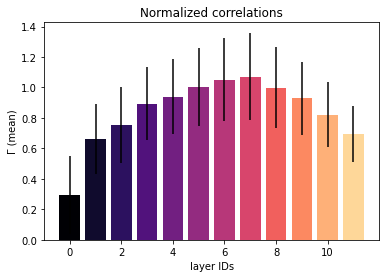

In [14]:
column = 'normalized_test_cc'
mean, std = corr_obj.summarize(session=session,
                        threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
# plt.ylim([0, 1.0])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title("Normalized correlations")
# plt.savefig(os.path.join(saved_results, 'svg_files',f'correlations_plot_normalized.svg'))
# saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/tikz_files'
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'correlations_plot_normalized.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )

In [11]:
corr_obj.data.head()

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
0,191113.0,0.0,0.0,40.0,0.0,0.046857,-0.016149,-0.007541,500.0,2.141444
1,191113.0,0.0,1.0,40.0,0.0,0.187930,0.123113,0.093085,500.0,1.322590
2,191113.0,0.0,2.0,40.0,0.0,0.175732,0.124929,0.064035,500.0,1.950964
3,191113.0,0.0,3.0,40.0,0.0,0.087614,0.034642,0.032557,500.0,1.064028
4,191113.0,0.0,4.0,40.0,0.0,0.050437,-0.012446,-0.006368,500.0,1.954458
